In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [233]:
plt.matplotlib.colors.Colormap

matplotlib.colors.Colormap

In [234]:
data  = pd.read_csv(r"stock price prediction.csv")

In [235]:
data.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [236]:
data['Date'] = pd.to_datetime(data['Date'])

In [237]:
data.rename(columns = {"Turnover (Lacs)": "Turnover"},inplace = True)

In [238]:
data.shape

(2035, 8)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover              2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [240]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover                0
dtype: int64

C:\Users\manil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

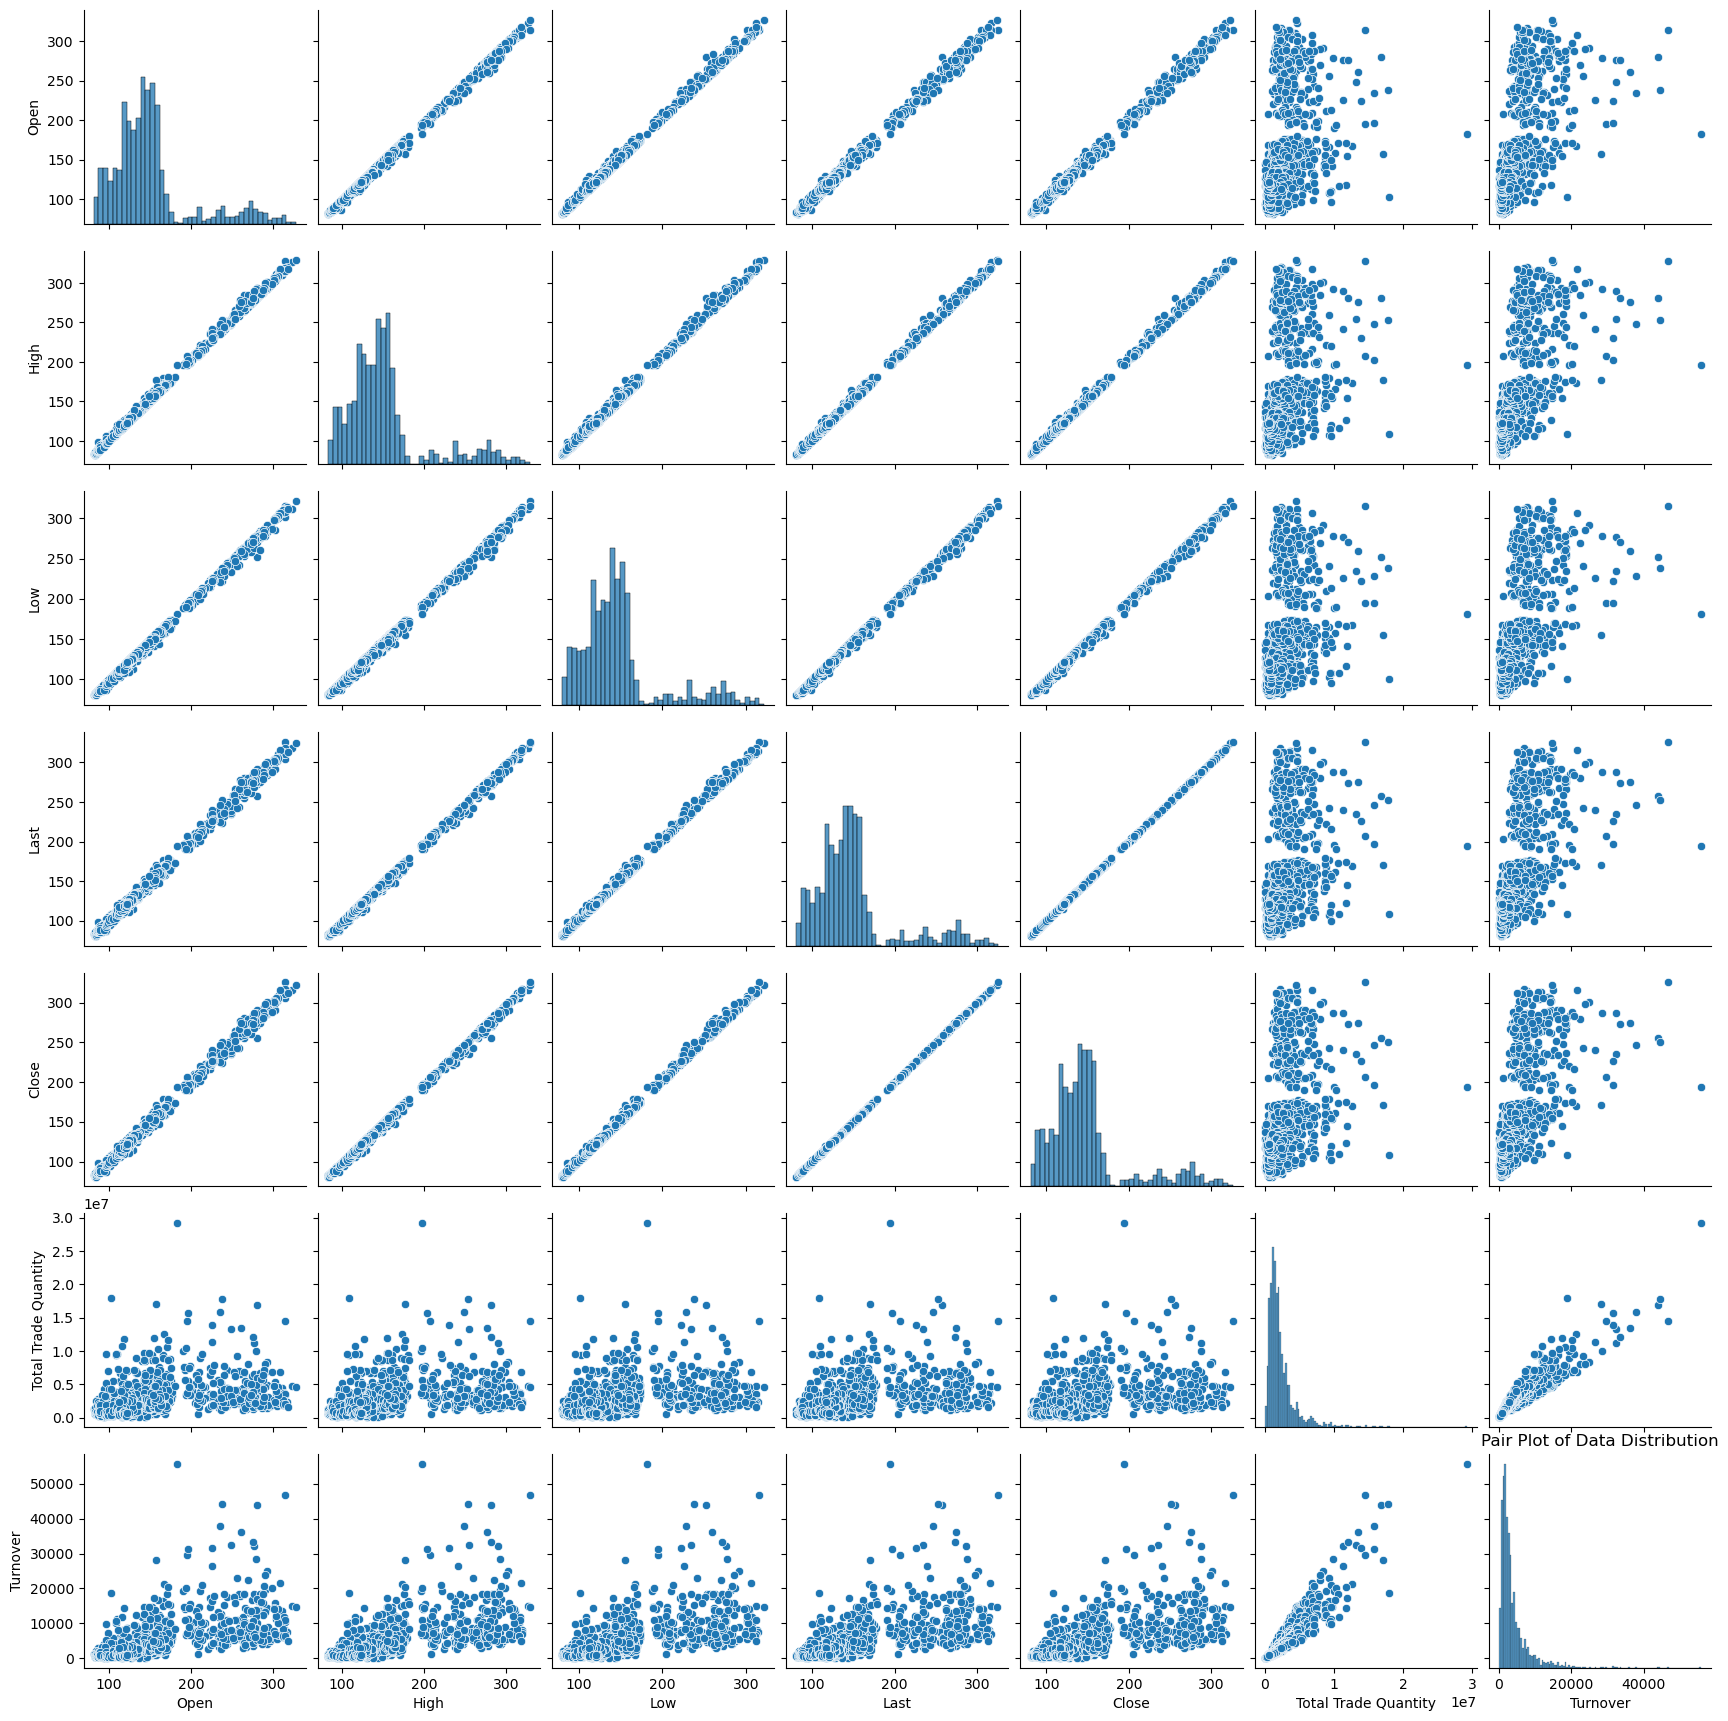

In [241]:
plt.figure(figsize=(10,8))
sns.pairplot(data,)
plt.title('Pair Plot of Data Distribution')
plt.show()


In [242]:
X = data.drop("Turnover",axis = 1)

In [243]:
X.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859


In [244]:
y = data["Turnover"]

In [245]:
y.head(2)

0     7162.35
1    11859.95
Name: Turnover, dtype: float64

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

In [248]:
from sklearn.preprocessing import StandardScaler

Xtrain_numeric = Xtrain.drop(columns=['Date'])

# Step 2: Convert any remaining non-numeric columns to numeric if necessary
Xtrain_numeric = Xtrain_numeric.apply(pd.to_numeric, errors='ignore')

scaler = StandardScaler()
scaler.fit(Xtrain_numeric)

Xtrain_scaled = scaler.transform(Xtrain_numeric)

In [249]:
Xtest_numeric = Xtest.drop(columns=['Date'])

# Step 2: Convert any remaining non-numeric columns to numeric if necessary
Xtest_numeric = Xtest_numeric.apply(pd.to_numeric, errors='ignore')

scaler = StandardScaler()
scaler.fit(Xtrain_numeric)

Xtest_scaled = scaler.transform(Xtest_numeric)

In [250]:
Xtrain_scaled.shape , Xtest_scaled.shape , ytrain.shape , ytest.shape

((1628, 6), (407, 6), (1628,), (407,))

In [251]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
rf = RandomForestRegressor()

In [253]:
rf.fit(Xtrain_scaled,ytrain)

RandomForestRegressor()

In [254]:
rf.score(Xtest_scaled,ytest)

0.9774691968834767

In [255]:
rf.score(Xtrain_scaled,ytrain)

0.9951378097972323

In [256]:
y_pred = rf.predict(Xtest_scaled)

In [257]:
from sklearn import metrics
from math import sqrt

In [258]:
MSE = mean_squared_error(ytest , y_pred)
MAE = mean_absolute_error(ytest , y_pred)
RMSE = sqrt(MSE)

In [259]:
print(MSE,MAE,RMSE)

586143.4376568316 149.10278476658453 765.6000507163199


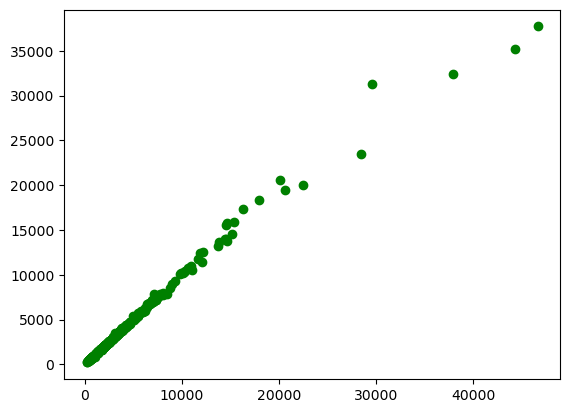

In [260]:
plt.scatter(x = ytest,y = y_pred,c = "g")
plt.show()

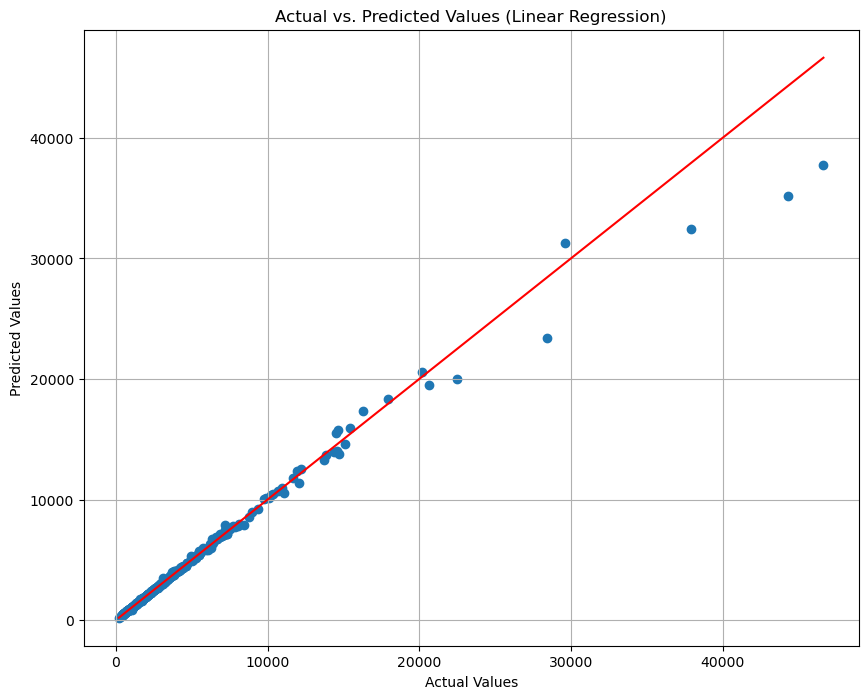

In [261]:
plt.figure(figsize=(10, 8))
plt.scatter(x=ytest, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)

# Plot the linear regression line
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')  # Diagonal line for perfect prediction
plt.show()

In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
lr = LinearRegression()

In [264]:
lr.fit(Xtrain_scaled,ytrain)

LinearRegression()

In [265]:
lr.score(Xtest_scaled,ytest)

0.9195504165963071

In [266]:
y_predict = lr.predict(Xtest_scaled)

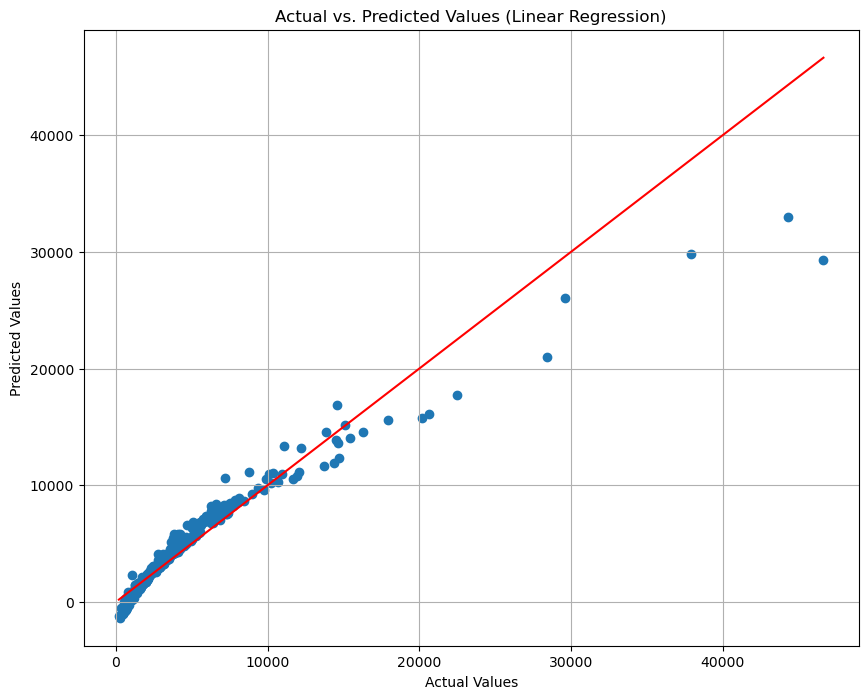

In [267]:
plt.figure(figsize=(10, 8))
plt.scatter(x=ytest, y=y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)

# Plot the linear regression line
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')  # Diagonal line for perfect prediction
plt.show()

In [268]:
from sklearn import metrics
from math import sqrt

In [269]:
MSE = mean_squared_error(ytest , y_predict)
MAE = mean_absolute_error(ytest , y_predict)
RMSE = sqrt(MSE)

In [270]:
print(MSE,MAE,RMSE)

2092912.3178799914 700.5803887693598 1446.6901250371454
